# Employee Data Cleaning and Exploratory Data Analysis

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Load the data

In [138]:
emp = pd.read_excel(r"C:\Users\sagar\Downloads\Rawdata.xlsx")  # Reading the Excel file
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


### Step 2: Observing the data frame

In [141]:
print(emp.columns)# Display column names
print()
print(emp.shape)# Display the shape of the DataFrame (rows, columns)
print()
print(emp.info())  # DataFrame information including data types and non-null counts

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

(6, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes
None


### Step 3: Checking for missing values

In [144]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [146]:
print(emp.isnull().sum())  # Sum of missing values in each column

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64


#### Based on the above observation, we can say that the DataFrame contains missing values and noisy characters. We need to remove all of these

### Step 4: Data cleansing

In [150]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [152]:
# Removing non-word characters (like special characters) from 'Name' column
emp['Name'] = emp['Name'].str.replace(r'\W', '', regex=True)

In [154]:
emp['Name']# we can see all non word charcter are removed by using regex

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [164]:
# Removing non-word characters from 'Domain' column
emp['Domain'] = emp['Domain'].str.replace(r'\W', '', regex=True)
emp['Domain']# we can see all non word charcter are removed by using regex

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [166]:
# Extracting numerical values from 'Age' column
emp['Age'] = emp['Age'].str.extract(r'(\d+)')
emp["Age"]

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [168]:
# Removing non-word characters from 'Location' column
emp['Location'] = emp['Location'].str.replace(r'\W', '', regex=True)
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [170]:
# Removing non-word characters from 'Salary' column
emp['Salary'] = emp['Salary'].str.replace(r'\W', '', regex=True)
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [172]:
# Extracting numerical values from 'Exp' column
emp['Exp'] = emp['Exp'].str.extract(r'(\d+)')#we extracting numrica values
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [174]:
emp #we can see the all noisy charcters are removed

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# EDA TECHNIQUE LETS APPLY

### Step 5: Creating a copy of the clean data for further analysis

In [178]:
clean_data = emp.copy()

In [180]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


### Step 6: Missing value treatment for numerical data(EDA Technique)

In [43]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [44]:
clean_data.isna().sum()# isnull and isna both are same

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [100]:
clean_data['Age']#we can see in age some missing values are there

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

### Step 6: Missing value treatment

#### Missing value treatment for numerical data
-  For numerical data we can apply mean, median, mode stratergy 

In [93]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

##### "pd.to_numeric" function convert any non numeric(string) values to numeric values. "np.mean()" function will findout the mean of  the age columns ignoring the, "fillna" function is used to fill null value.

In [95]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

#### Missing value treatment for categorical data
-  For categorical data we can apply mode, knn stratergy here we used mode

In [98]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

### Step 7: Converting data types

In [104]:
clean_data['Age'] = clean_data['Age'].astype(int)
clean_data['Salary'] = clean_data['Salary'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [106]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


### Step 8: Saving the cleaned data

In [109]:
clean_data.to_csv('clean_data.csv')

### Step9:  Univariate Analysis (EDA Technique) - Distribution of 'Salary'

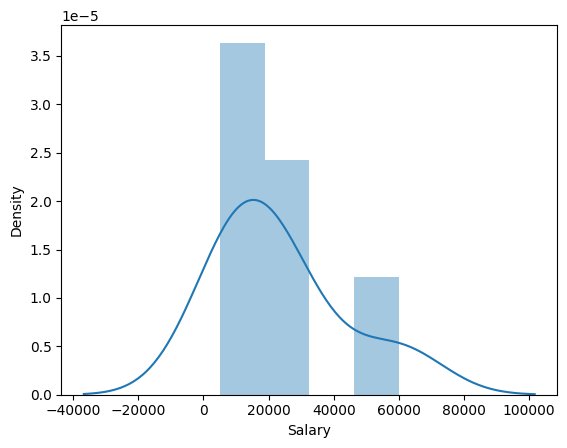

In [213]:
sns.distplot(clean_data['Salary'])
plt.show()

### Step10: Bivariate Analysis(EDA Technique) - Relationship between 'Experience' and 'Salary'

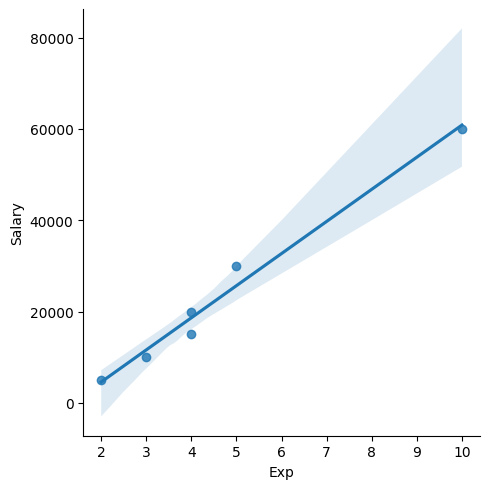

In [216]:
sns.lmplot(data=clean_data, x='Exp', y='Salary')

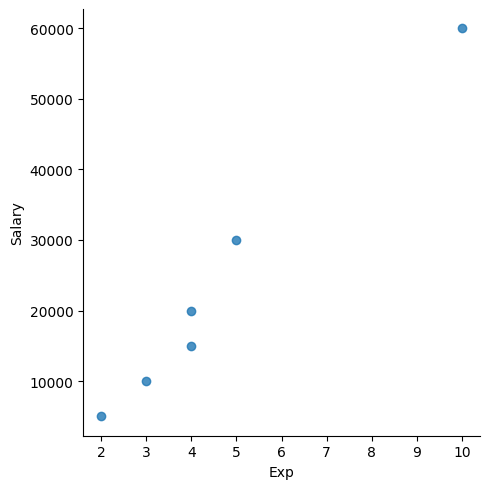

In [218]:
sns.lmplot(data=clean_data, x='Exp', y='Salary', fit_reg=False)
plt.show()

### Step 11: Variable identification and separation(EDA Technique)

In [126]:
x_iv = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']]  # Independent variables
y_dv = clean_data['Salary']  # Dependent variable

### Step 12: Variable transformation(EDA Technique)

In [222]:
transformation = pd.get_dummies(clean_data, dtype=int)
transformation.head()

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


# Next step 
- we splitn x_iv -- x_train, x_test
- we split y_dv -- y_train, y_test
- build the ml model with x_train & y_train 